<h1>Project 3: Human Activity Recognition</h1>
<h3>Ágúst Pálmason Morthens & Elisa Perini</h3>
March 2022, CM2007
<h1>Introduction</h1>
In this assignement a convolutional neural network is used to detect human activity. This activity detection is very important in the health technology field, for instance for providing insights in fitness or for detecting falls. In order to make the most of the available data, this detection should happen in nearly real-time, as in a very short interval of time.<br>
The <em>Khulna University Human Activity Recognition</em> dataset was used: https://data.mendeley.com/datasets/45f952y38r/5.<br>
This dataset contains accelerometer and gyrometer data on 18 different activities using smartphone sensors. The data provides 20750 non overlapping subsamples of 3 seconds of activity. The activities are:
<ol>
    <li>Stand</li>
    <li>Sit</li> 
    <li>Talk-sit</li> 
    <li>Talk-stand</li> 
    <li>Stand-sit</li> 
    <li>Lay</li> 
    <li>Lay-stand</li> 
    <li>Pick</li> 
    <li>Jump</li> 
    <li>Push-up</li>
    <li>Sit-up</li> 
    <li>Walk</li> 
    <li>Walk backward</li> 
    <li>Walk-circle</li> 
    <li>Run</li> 
    <li>Stair-up</li> 
    <li>Stair-down</li> 
    <li>Table-tennis</li>
</ol>
To see if this dataset could be used to predict activities in real time, a convolutional neural network was used on 3 seconds, 1 second and 0,25 second of data.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import cv2
import os
from datetime import timedelta

<h1>Importing the data</h1>

In [2]:
# name columns of the dataframe
column_names = []
for i in range(300):
    name = 'ax_' + str(i) 
    column_names.append(name)
for i in range(300):
    name = 'ay_' + str(i)
    column_names.append(name)
    
for i in range(300):
    name = 'az_' + str(i)
    column_names.append(name)
    
for i in range(300):
    name = 'gx_' + str(i)
    column_names.append(name)

for i in range(300):
    name = 'gy_' + str(i)
    column_names.append(name)
    
for i in range(300):
    name = 'gz_' + str(i)
    column_names.append(name)

column_names.append('class')
column_names.append('length')
column_names.append('serial number')
    
# import data into a dataframe
df = pd.read_csv('KU-HAR_time_domain_subsamples_20750x300.csv',  header = None, names = column_names)
df

,ax_0,ax_1,ax_2,ax_3,ax_4,ax_5,ax_6,ax_7,ax_8,ax_9,...,gz_293,gz_294,gz_295,gz_296,gz_297,gz_298,gz_299,class,length,serial number
0,0.004230,-0.000280,-0.013906,-0.002544,0.027433,0.058300,0.051670,0.071857,0.080653,0.047917,...,-0.016692,-0.018566,-0.017361,-0.017919,-0.016680,-0.016650,-0.013097,0,300,1
1,0.012482,0.032496,0.067856,0.071552,0.078103,0.040353,-0.001059,-0.018580,-0.026813,-0.011280,...,-0.008210,-0.010408,-0.011459,-0.011747,-0.010394,-0.008070,-0.004354,0,300,2
2,0.012127,0.028458,0.062075,0.052611,0.022942,-0.010017,-0.023151,-0.028515,0.005036,0.008450,...,0.000915,0.000771,-0.002560,-0.003020,-0.004190,0.000215,0.000850,0,300,3
3,0.052964,0.074319,0.110670,0.108490,0.091825,0.056989,0.029337,-0.016724,-0.042265,-0.053983,...,-0.001209,0.002878,0.000663,0.000982,-0.002148,-0.009200,-0.010653,0,300,4
4,-0.020462,-0.030787,-0.008617,0.008906,0.045046,0.042136,0.045037,0.045182,0.025113,0.021730,...,-0.006369,-0.006614,-0.004698,-0.007279,-0.006861,-0.006161,-0.006113,0,300,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20745,1.871600,1.648800,1.608900,1.802300,1.475000,1.390700,1.137800,1.289600,0.963750,1.022200,...,-0.497640,-0.432590,-0.414760,-0.363110,-0.329190,-0.460960,-0.621920,9,300,20746
20746,1.889400,2.022700,0.817300,-0.505840,2.462200,3.814200,2.661000,2.651200,1.991400,4.427300,...,-0.208820,-0.288930,-0.320880,-0.379540,-0.408210,-0.507970,-0.548040,9,300,20747
20747,1.269500,1.312200,0.725570,0.531290,0.958420,-0.049679,1.223100,1.837000,0.989740,1.882600,...,1.218500,1.125400,0.639470,0.277320,0.172710,-0.002894,0.023955,9,300,20748
20748,-5.562200,-2.797000,-2.353300,-3.075600,-4.136100,-4.028800,-0.580260,0.346070,-2.631700,-2.790000,...,-0.246670,-0.209020,-0.128670,-0.104730,-0.131960,-0.150780,-0.187320,9,300,20749


In [3]:
#useful functions to calculate missing values
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")

def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
            
#calculate missing values in the rawdata
print("Missing values")
print(missing_cols(df))
print("____")
print(perc_missing(df))

Missing values
no missing values left
None
____
None


In [4]:
# check if every series has the same number of values
df['length'].value_counts()

300    20750
Name: length, dtype: int64

Text(0, 0.5, 'Occurences')

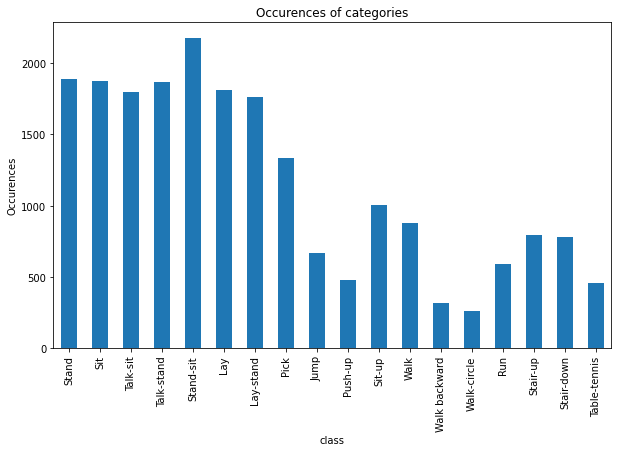

In [5]:
# plot the occurences of each activity in the dataset
x_axis = [i for i in range(0, 18)]
classes_names = ['Stand', 'Sit', 'Talk-sit', 'Talk-stand','Stand-sit', 'Lay', 'Lay-stand',
            'Pick', 'Jump', 'Push-up', 'Sit-up', 'Walk', 'Walk backward',
            'Walk-circle', 'Run', 'Stair-up', 'Stair-down', 'Table-tennis']

plt.figure(figsize=(10, 6))
df.groupby('class').size().plot.bar()
plt.title('Occurences of categories')
plt.xticks(x_axis, classes_names)
plt.ylabel('Occurences')

As can be seen in the plot, the dataset is fairly inbalanced, there is a lot of standing, sitting for instance and very few of walking backwards or walking in circle. This imbalance needs to be taken into account when building the model later.

In [6]:
# take accelaration and gyroscope data separately
ax = df.iloc[:,:300].values
ay = df.iloc[:,300:600].values
az = df.iloc[:,600:900].values

gx = df.iloc[:,900:1200].values
gy = df.iloc[:,1200:1500].values
gz = df.iloc[:,1500:1800].values

In [7]:
# combine accelerometer data and gyroscope data in a 3D array
data = np.array([ax,ay,az,gx,gy,gz])
data.shape

(6, 20750, 300)

In [8]:
data = np.transpose(data,(1,2,0))
data.shape

(20750, 300, 6)

The shape of the dataset follows the following patter: (samples, time steps, features).

<h1>1s data</h1>
The 3 second data was split into 3 blocks of 1 second. This increased the amount of series threefold.

In [9]:
# 1st second
ax1 = df.iloc[:,:100].values
ay1 = df.iloc[:,300:400].values
az1 = df.iloc[:,600:700].values

gx1 = df.iloc[:,900:1000].values
gy1 = df.iloc[:,1200:1300].values
gz1 = df.iloc[:,1500:1600].values

# 2nd second
ax2 = df.iloc[:,100:200].values
ay2 = df.iloc[:,400:500].values
az2 = df.iloc[:,700:800].values

gx2 = df.iloc[:,1000:1100].values
gy2 = df.iloc[:,1300:1400].values
gz2 = df.iloc[:,1600:1700].values

# 3rd second
ax3 = df.iloc[:,200:300].values
ay3 = df.iloc[:,500:600].values
az3 = df.iloc[:,800:900].values

gx3 = df.iloc[:,1100:1200].values
gy3 = df.iloc[:,1400:1500].values
gz3 = df.iloc[:,1700:1800].values

In [10]:
# combine values
temp1 = np.array([ax1,ay1,az1,gx1,gy1,gz1])
temp2 = np.array([ax2,ay2,az2,gx2,gy2,gz2])
temp3 = np.array([ax3,ay3,az3,gx3,gy3,gz3])
data1s = np.hstack((temp1, temp2, temp3))
data1s.shape

(6, 62250, 100)

In [11]:
data1s = np.transpose(data1s,(1,2,0))
data1s.shape

(62250, 100, 6)

<h1>0.25 second data</h1>
The 3 second data was then split in 12 blocks of 0,25 seconds. The data increased 12-fold. This set is close to a real-time prediction.

In [12]:
# 0-0,25 seconds
ax1 = df.iloc[:,:25].values
ay1 = df.iloc[:,300:325].values
az1 = df.iloc[:,600:625].values

gx1 = df.iloc[:,900:925].values
gy1 = df.iloc[:,1200:1225].values
gz1 = df.iloc[:,1500:1525].values

# 0,25-0,5 seconds
ax2 = df.iloc[:,25:50].values
ay2 = df.iloc[:,325:350].values
az2 = df.iloc[:,625:650].values

gx2 = df.iloc[:,925:950].values
gy2 = df.iloc[:,1225:1250].values
gz2 = df.iloc[:,1525:1550].values

# 0,5- 0,75 seconds
ax3 = df.iloc[:,50:75].values
ay3 = df.iloc[:,350:375].values
az3 = df.iloc[:,650:675].values

gx3 = df.iloc[:,950:975].values
gy3 = df.iloc[:,1250:1275].values
gz3 = df.iloc[:,1550:1575].values

# 0,75 - 1 seconds
ax4 = df.iloc[:,75:100].values
ay4 = df.iloc[:,375:400].values
az4 = df.iloc[:,675:700].values

gx4 = df.iloc[:,975:1000].values
gy4 = df.iloc[:,1275:1300].values
gz4 = df.iloc[:,1575:1600].values

#1 - 1,25 seconds
ax5 = df.iloc[:,100:125].values
ay5 = df.iloc[:,400:425].values
az5 = df.iloc[:,700:725].values

gx5 = df.iloc[:,1000:1025].values
gy5 = df.iloc[:,1300:1325].values
gz5 = df.iloc[:,1600:1625].values

# 1,25 - 1,5 seconds
ax6 = df.iloc[:,125:150].values
ay6 = df.iloc[:,425:450].values
az6 = df.iloc[:,725:750].values

gx6 = df.iloc[:,1025:1050].values
gy6 = df.iloc[:,1325:1350].values
gz6 = df.iloc[:,1625:1650].values

# 1,5 -1,75 seconds
ax7 = df.iloc[:,150:175].values
ay7 = df.iloc[:,450:475].values
az7 = df.iloc[:,750:775].values

gx7 = df.iloc[:,1050:1075].values
gy7 = df.iloc[:,1350:1375].values
gz7 = df.iloc[:,1650:1675].values

# 1,75 - 2 seconds
ax8 = df.iloc[:,175:200].values
ay8 = df.iloc[:,475:500].values
az8 = df.iloc[:,775:800].values

gx8 = df.iloc[:,1075:1100].values
gy8 = df.iloc[:,1375:1400].values
gz8 = df.iloc[:,1675:1700].values

# 2 - 2,25 seconds
ax9 = df.iloc[:,200:225].values
ay9 = df.iloc[:,500:525].values
az9 = df.iloc[:,800:825].values

gx9 = df.iloc[:,1100:1125].values
gy9 = df.iloc[:,1400:1425].values
gz9 = df.iloc[:,1700:1725].values

# 2,25 - 2,5 seconds
ax10 = df.iloc[:,225:250].values
ay10 = df.iloc[:,525:550].values
az10 = df.iloc[:,825:850].values

gx10 = df.iloc[:,1125:1150].values
gy10 = df.iloc[:,1425:1450].values
gz10 = df.iloc[:,1725:1750].values

# 2,5 -2,75 seconds
ax11 = df.iloc[:,250:275].values
ay11 = df.iloc[:,550:575].values
az11 = df.iloc[:,850:875].values

gx11 = df.iloc[:,1150:1175].values
gy11 = df.iloc[:,1450:1475].values
gz11 = df.iloc[:,1750:1775].values

# 2,75 - 3 seconds
ax12 = df.iloc[:,275:300].values
ay12 = df.iloc[:,575:600].values
az12 = df.iloc[:,875:900].values

gx12 = df.iloc[:,1175:1200].values
gy12 = df.iloc[:,1475:1500].values
gz12 = df.iloc[:,1775:1800].values

In [13]:
# combine all data into 3D array
temp1 = np.array([ax1,ay1,az1,gx1,gy1,gz1])
temp2 = np.array([ax2,ay2,az2,gx2,gy2,gz2])
temp3 = np.array([ax3,ay3,az3,gx3,gy3,gz3])
temp4 = np.array([ax4,ay4,az4,gx4,gy4,gz4])
temp5 = np.array([ax5,ay5,az5,gx5,gy5,gz5])
temp6 = np.array([ax6,ay6,az6,gx6,gy6,gz6])
temp7 = np.array([ax7,ay7,az7,gx7,gy7,gz7])
temp8 = np.array([ax8,ay8,az8,gx8,gy8,gz8])
temp9 = np.array([ax9,ay9,az9,gx9,gy9,gz9])
temp10 = np.array([ax10,ay10,az10,gx10,gy10,gz10])
temp11 = np.array([ax11,ay11,az11,gx11,gy11,gz11])
temp12 = np.array([ax12,ay12,az12,gx12,gy12,gz12])
data025s = np.hstack((temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8, temp9, temp10, temp11, temp12))
data025s.shape

(6, 249000, 25)

In [14]:
data025s = np.transpose(data025s,(1,2,0))
data025s.shape

(249000, 25, 6)

<h1>Dealing with imbalanced dataset</h1>
Since the dataset was imbalanced, the following part calculates class weights, that are later used in the model to deal with the imbalance.<br>
First the amount of samples per class is counted, and this is used to calculate the weights with the sklearn function <em>compute_class_weight</em>.

In [15]:
import sklearn

# Count samples per class
classes_zero = df[df['class'] == 0]
classes_one = df[df['class'] == 1]
classes_two = df[df['class'] == 2]
classes_three = df[df['class'] == 3]
classes_four = df[df['class'] == 4]
classes_five = df[df['class'] == 5]
classes_six = df[df['class'] == 6]
classes_seven = df[df['class'] == 7]
classes_eight = df[df['class'] == 8]
classes_nine = df[df['class'] == 9]
classes_ten = df[df['class'] == 10]
classes_eleven = df[df['class'] == 11]
classes_twelve = df[df['class'] == 12]
classes_thirteen = df[df['class'] == 13]
classes_fourteen = df[df['class'] == 14]
classes_fifteen = df[df['class'] == 15]
classes_sixteen = df[df['class'] == 16]
classes_seventeen = df[df['class'] == 17]

# Convert parts into NumPy arrays for weight computation
zero_numpy = classes_zero['class'].to_numpy()
one_numpy = classes_one['class'].to_numpy()
two_numpy = classes_two['class'].to_numpy()
three_numpy = classes_three['class'].to_numpy()
four_numpy = classes_four['class'].to_numpy()
five_numpy = classes_five['class'].to_numpy()
six_numpy = classes_six['class'].to_numpy()
seven_numpy = classes_seven['class'].to_numpy()
eight_numpy = classes_eight['class'].to_numpy()
nine_numpy = classes_nine['class'].to_numpy()
ten_numpy = classes_ten['class'].to_numpy()
eleven_numpy = classes_eleven['class'].to_numpy()
twelve_numpy = classes_twelve['class'].to_numpy()
thirteen_numpy = classes_thirteen['class'].to_numpy()
fourteen_numpy = classes_fourteen['class'].to_numpy()
fifteen_numpy = classes_fifteen['class'].to_numpy()
sixteen_numpy = classes_sixteen['class'].to_numpy()
seventeen_numpy = classes_seventeen['class'].to_numpy()

all_together = np.concatenate((zero_numpy, one_numpy, two_numpy, three_numpy, four_numpy, five_numpy, six_numpy,
                              seven_numpy, eight_numpy, nine_numpy, ten_numpy, eleven_numpy, twelve_numpy,
                              thirteen_numpy, fourteen_numpy, fifteen_numpy, sixteen_numpy, seventeen_numpy))

# Compute weights
weights = sklearn.utils.class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(all_together), y = all_together)

# convert weights to a dictionary
weights = dict(zip(np.unique(all_together), weights))
print(weights)

{0: 0.6112289383763403, 1: 0.6151428910233606, 2: 0.6415012675446732, 3: 0.6177801595808027, 4: 0.5292827262524232, 5: 0.6358399215542073, 6: 0.6542439147433472, 7: 0.8647995332166375, 8: 1.7308975642308975, 9: 2.4016203703703702, 10: 1.1470425649530127, 11: 1.3070042831947595, 12: 3.63652295828952, 13: 4.450879450879451, 14: 1.9374416433239963, 15: 1.4445836814257866, 16: 1.4760278844785888, 17: 2.516982047549733}


<h1>Train test split</h1>
The dataset is split into a train and test set. A test set of 0,25 was chosen.

In [ ]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

In [17]:
# separating the target
y = df.iloc[:,1800].values
X = data

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify = y)

Since the classes are categorical, they are converted into dummies.

In [18]:
# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# shape of the array
X_train.shape

# set the size of the input
input_shape = (300, 6)

The shape of the input for the 3 second dataset is (300, 6), since we have 300 time steps in 3 seconds (sampling frequency of 100Hz), and 6 features (acceleration in x, y, and z-axis, and gyroscope around x, y, and z-axis). There are 20750 samples.

In [ ]:
# Create the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape))
model.add(Dropout(0.5)) # dropout some weights to prevent overfitting
model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(18, activation='softmax'))

The neural network consists in a 1D convolution, followed by a dropout, then a max pooling. The next step is a flattening followed by 3 dense layers, that gradually get the data to the desired output of 18 classes.<br>
An early stop, with a patience of 20 is implemented to prevent overfitting.

In [21]:
# Add early stop to prevent overfitting and save weights
check = ModelCheckpoint('weight3s.hdf5', save_best_only=True, monitor='val_loss', mode='min')
earlystopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights = True)

In [22]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 296, 64)           1984      
                                                                 
 dropout (Dropout)           (None, 296, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3776)              0         
                                                                 
 dense (Dense)               (None, 100)               377700    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                        

As can be seen above, the network consits in 385,652 trainable parameters.<br>
The model is trained with 200 epochs and a validation split of 0.2. The weights to deal with imbalance are taken into account when training the model. A batch size of 32 was chosen.

In [23]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# Train the model
history = model.fit(X_train, y_train, batch_size = 32,
                    epochs = 200,
                    verbose = 1,
                    class_weight=weights,
                    validation_split = 0.2,
                    callbacks=[check, earlystopping])

Epoch 1/200
390/390 [==============================] - 4s 10ms/step - loss: 4.9052 - accuracy: 0.1822 - val_loss: 1.8255 - val_accuracy: 0.3428
Epoch 2/200
390/390 [==============================] - 4s 9ms/step - loss: 1.4272 - accuracy: 0.4449 - val_loss: 1.3381 - val_accuracy: 0.5670
Epoch 3/200
390/390 [==============================] - 3s 9ms/step - loss: 43.3486 - accuracy: 0.4083 - val_loss: 1.4939 - val_accuracy: 0.4205
Epoch 4/200
390/390 [==============================] - 4s 9ms/step - loss: 1.2467 - accuracy: 0.5333 - val_loss: 1.2119 - val_accuracy: 0.5631
Epoch 5/200
390/390 [==============================] - 3s 9ms/step - loss: 0.9777 - accuracy: 0.6184 - val_loss: 1.2121 - val_accuracy: 0.5564
Epoch 6/200
390/390 [==============================] - 3s 9ms/step - loss: 0.8367 - accuracy: 0.6523 - val_loss: 1.0104 - val_accuracy: 0.6364
Epoch 7/200
390/390 [==============================] - 3s 9ms/step - loss: 0.7579 - accuracy: 0.6975 - val_loss: 0.9573 - val_accuracy: 0.62

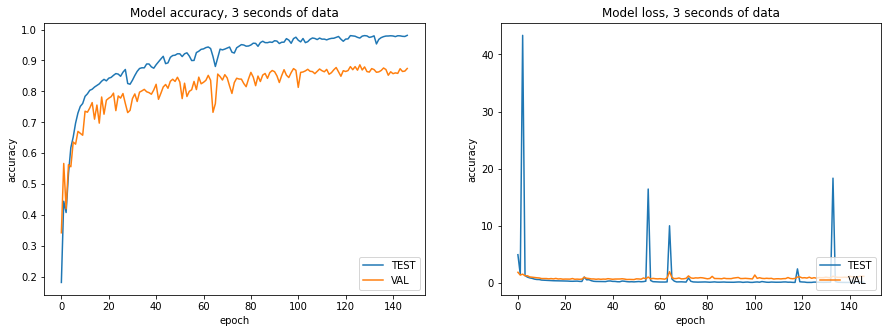

In [24]:
# Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = np.reshape(axes, -1)

axes[0].plot(history.history['accuracy'], label = 'TEST')
axes[0].plot(history.history['val_accuracy'], label = 'VAL')
axes[0].set(title = 'Model accuracy, 3 seconds of data', ylabel = 'accuracy', xlabel = 'epoch')
axes[0].legend(loc='lower right')

axes[1].plot(history.history['loss'], label = 'TEST')
axes[1].plot(history.history['val_loss'], label = 'VAL')
axes[1].set(title = 'Model loss, 3 seconds of data', ylabel = 'accuracy', xlabel = 'epoch')
axes[1].legend(loc='lower right')

As can be seen in the plots above, a test accuracy of above 0,9 and a training accuracy of above 0,8 is reached. The model stopped early at 147 epochs, and as can be seen in both plots, there is no overfitting. The validation loss stays low and doesn't start increasing.

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """function to plot the confusion matrix."""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


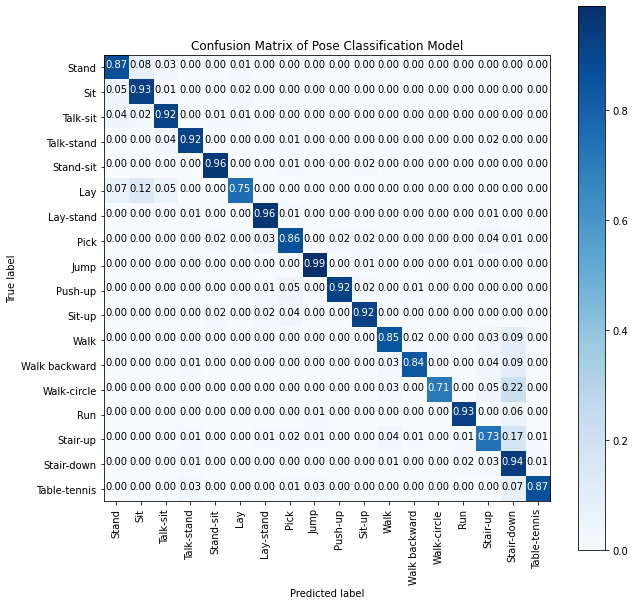

In [26]:
# Classify pose in the TEST dataset using the trained model
y_pred = model.predict(X_test)

# Convert the prediction result to class name
label_names = y_test.columns
y_pred_label = [label_names[i] for i in np.argmax(y_pred, axis=1)]
y_true_label = [label_names[i] for i in np.argmax(np.array(y_test), axis=1)]
label_names = classes_names

# Plot the confusion matrix
cm = confusion_matrix(np.argmax(np.array(y_test), axis=1), np.argmax(y_pred, axis=1))
plot_confusion_matrix(cm,
                      label_names,
                      normalize=True,
                      title ='Confusion Matrix of Pose Classification Model')

In [27]:
# Print the classification report
print('\nClassification Report:\n', classification_report(y_true_label,
                                                          y_pred_label))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       472
           1       0.80      0.93      0.86       469
           2       0.86      0.92      0.89       449
           3       0.97      0.92      0.94       467
           4       0.98      0.96      0.97       545
           5       0.94      0.75      0.84       453
           6       0.95      0.96      0.95       441
           7       0.89      0.86      0.88       333
           8       0.95      0.99      0.97       166
           9       0.92      0.92      0.92       120
          10       0.92      0.92      0.92       251
          11       0.93      0.85      0.89       221
          12       0.90      0.84      0.87        79
          13       0.96      0.71      0.81        65
          14       0.97      0.93      0.95       149
          15       0.78      0.73      0.76       199
          16       0.66      0.94      0.77       195
  

The confusion matrix shows that overall the model is really good at predicting the activity, which can also be seen as an overall accuracy of 0,89 in the classification report. It is especially good at predicting jumping, with a recall of 0,99. However it is a bit worse at predicting walking in circle, laying and walking backwards. Walking in circle is often predicted as stair down. This is probably due to the fact that these activities don't have such characteristic patterns as for instance jumping does (very high acceleration for jumping). 

<h1>Model with 1 second data</h1>
Since the accuracy was already high with 3 second data, the data was split in 1 second data to see if the model was usable in real time. The same steps as in the 3 second model were taken.

In [28]:
# separating the target
y1s = np.hstack((df.iloc[:,1800].values, df.iloc[:,1800].values, df.iloc[:,1800].values))
X1s = data1s

# creating the training and validation set
X1s_train, X1s_test, y1s_train, y1s_test = train_test_split(X1s, y1s, random_state=42, test_size=0.25, stratify = y1s)

In [29]:
# creating dummies of target variable for train and validation set
y1s_train = pd.get_dummies(y1s_train)
y1s_test = pd.get_dummies(y1s_test)

In [30]:
X1s_train = np.array(X1s_train)
X1s_test = np.array(X1s_test)

# shape of the array
X1s_train.shape

input_shape = (100, 6)

The shape of the 1 second dataset differs from the 3 second dataset, since there are only a 100 time steps in a second. But there are 3x times more samples than in the 3 second dataset. Here there are 62250 samples.

In [31]:
# Create the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(18, activation='softmax'))

In [32]:
# Add early stop to prevent overfitting and save weights
check = ModelCheckpoint('weight1s.hdf5', save_best_only=True, monitor='val_loss', mode='min')
earlystopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights = True)

In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 96, 64)            1984      
                                                                 
 dropout_1 (Dropout)         (None, 96, 64)            0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 19, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1216)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               121700    
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                      

With less measurements, there are less trainable parameters.

In [34]:
X1s_train = np.asarray(X1s_train)
X1s_test = np.asarray(X1s_test)

history1s = model.fit(X1s_train, y1s_train, batch_size = 32,
                epochs = 200,
                verbose = 1,
                class_weight=weights,
                validation_split = 0.2,
                callbacks=[check, earlystopping])

Epoch 1/200
1168/1168 [==============================] - 7s 6ms/step - loss: 15.8538 - accuracy: 0.3441 - val_loss: 3.9750 - val_accuracy: 0.2474
Epoch 2/200
1168/1168 [==============================] - 6s 6ms/step - loss: 1.7292 - accuracy: 0.4732 - val_loss: 1.2551 - val_accuracy: 0.5326
Epoch 3/200
1168/1168 [==============================] - 6s 5ms/step - loss: 1.0534 - accuracy: 0.6068 - val_loss: 1.1415 - val_accuracy: 0.6124
Epoch 4/200
1168/1168 [==============================] - 7s 6ms/step - loss: 0.9096 - accuracy: 0.6609 - val_loss: 1.0302 - val_accuracy: 0.6232
Epoch 5/200
1168/1168 [==============================] - 7s 6ms/step - loss: 0.8132 - accuracy: 0.6927 - val_loss: 0.9194 - val_accuracy: 0.6786
Epoch 6/200
1168/1168 [==============================] - 6s 6ms/step - loss: 0.7504 - accuracy: 0.7218 - val_loss: 0.8762 - val_accuracy: 0.7229
Epoch 7/200
1168/1168 [==============================] - 6s 6ms/step - loss: 0.6984 - accuracy: 0.7413 - val_loss: 0.8574 - val_a

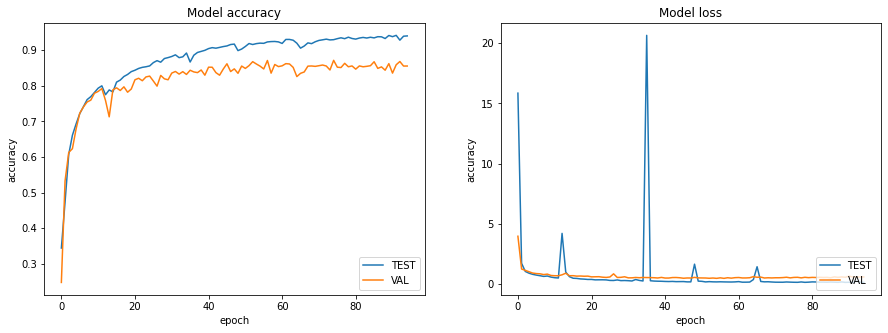

In [35]:
# Plots for visualizing the data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = np.reshape(axes, -1)

axes[0].plot(history1s.history['accuracy'], label = 'TEST')
axes[0].plot(history1s.history['val_accuracy'], label = 'VAL')
axes[0].set(title = 'Model accuracy', ylabel = 'accuracy', xlabel = 'epoch')
axes[0].legend(loc='lower right')

axes[1].plot(history1s.history['loss'], label = 'TEST')
axes[1].plot(history1s.history['val_loss'], label = 'VAL')
axes[1].set(title = 'Model loss', ylabel = 'accuracy', xlabel = 'epoch')
axes[1].legend(loc='lower right')

As in the 3 second model, the model does not overfit, but the early stop happens at an earlier epoch (epoch 95).

In [36]:
# Classify pose in the TEST dataset using the trained model
y1s_pred = model.predict(X1s_test)

Normalized confusion matrix


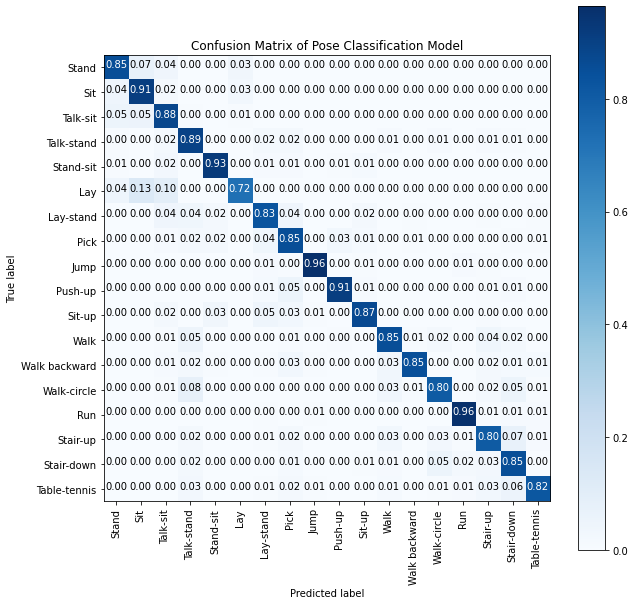

In [37]:
# Convert the prediction result to class name
y1s_pred_label = [label_names[i] for i in np.argmax(y1s_pred, axis=1)]
y1s_true_label = [label_names[i] for i in np.argmax(np.array(y1s_test), axis=1)]
label_names = classes_names

# Plot the confusion matrix
cm = confusion_matrix(np.argmax(np.array(y1s_test), axis=1), np.argmax(y1s_pred, axis=1))
plot_confusion_matrix(cm,
                      label_names,
                      normalize=True,
                      title ='Confusion Matrix of Pose Classification Model')

In [38]:
# Print the classification report
print('\nClassification Report:\n', classification_report(y1s_true_label,
                                                          y1s_pred_label))


Classification Report:
                precision    recall  f1-score   support

         Jump       0.96      0.96      0.96       499
          Lay       0.91      0.72      0.81      1360
    Lay-stand       0.89      0.83      0.86      1321
         Pick       0.83      0.85      0.84      1000
      Push-up       0.86      0.91      0.88       360
          Run       0.96      0.96      0.96       446
          Sit       0.78      0.91      0.84      1406
       Sit-up       0.90      0.87      0.88       754
   Stair-down       0.82      0.85      0.83       586
     Stair-up       0.84      0.80      0.82       598
        Stand       0.85      0.85      0.85      1415
    Stand-sit       0.95      0.93      0.94      1634
 Table-tennis       0.89      0.82      0.86       343
     Talk-sit       0.76      0.88      0.82      1348
   Talk-stand       0.89      0.89      0.89      1400
         Walk       0.91      0.85      0.88       661
Walk backward       0.89      0.85     

Overall the accuracy of the model was a bit lower than in the 3 second model, which was expected, but the difference is very minimal, since the overall accuracy decreased by only 3% from 0,89 to 0,86. In this case, laying was the hardest to predict and the lower accuracies are in the same classes as in the previous 3 second model. However the distribution is more equal than above.

<h1>Model with 0,25s of data</h1>
To see if an even shorter amount of time was enough to predict the activity, an interval of 0,25 seconds was used. The model is expected to perform worse than the 1 or 3 second models. The steps taken were the same as in the models above.

In [39]:
# separating the target
y025s = np.hstack((df.iloc[:,1800].values, df.iloc[:,1800].values, df.iloc[:,1800].values,
                 df.iloc[:,1800].values, df.iloc[:,1800].values, df.iloc[:,1800].values,
                 df.iloc[:,1800].values, df.iloc[:,1800].values, df.iloc[:,1800].values,
                 df.iloc[:,1800].values, df.iloc[:,1800].values, df.iloc[:,1800].values))
X025s = data025s

# creating the training and validation set
X025s_train, X025s_test, y025s_train, y025s_test = train_test_split(X025s, y025s, random_state=42, test_size=0.25, stratify = y025s)

In [40]:
# creating dummies of target variable for train and validation set
y025s_train = pd.get_dummies(y025s_train)
y025s_test = pd.get_dummies(y025s_test)

In [41]:
X025s_train = np.array(X025s_train)
X025s_test = np.array(X025s_test)

# shape of the array
X025s_train.shape

input_shape = (25, 6)

Here there are only 25 time steps. But there are 12x times more samples than in the 3 second dataset. Here there are 249000 samples.

In [42]:
# Create the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=input_shape))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(18, activation='softmax'))

In [43]:
# Add early stop to prevent overfitting and save weights
check = ModelCheckpoint('weight025s.hdf5', save_best_only=True, monitor='val_loss', mode='min')
earlystopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights = True)

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 21, 64)            1984      
                                                                 
 dropout_2 (Dropout)         (None, 21, 64)            0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               25700     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                      

The amount of trainble parameters decreased from the previous model to 33,652.

In [45]:
X025s_train = np.asarray(X025s_train)
X025s_test = np.asarray(X025s_test)

history025s = model.fit(X025s_train, y025s_train, batch_size = 32,
              epochs = 200,
              verbose = 1,
              class_weight=weights,
              validation_split = 0.2,
              callbacks=[check, earlystopping])

Epoch 1/200
4669/4669 [==============================] - 14s 3ms/step - loss: 4.0079 - accuracy: 0.4089 - val_loss: 1.5155 - val_accuracy: 0.4573
Epoch 2/200
4669/4669 [==============================] - 14s 3ms/step - loss: 3.7740 - accuracy: 0.4618 - val_loss: 1.6114 - val_accuracy: 0.4653
Epoch 3/200
4669/4669 [==============================] - 14s 3ms/step - loss: 1.5467 - accuracy: 0.5143 - val_loss: 1.2932 - val_accuracy: 0.5493
Epoch 4/200
4669/4669 [==============================] - 14s 3ms/step - loss: 3.4061 - accuracy: 0.5488 - val_loss: 1.3365 - val_accuracy: 0.5440
Epoch 5/200
4669/4669 [==============================] - 14s 3ms/step - loss: 1.3233 - accuracy: 0.5747 - val_loss: 1.2016 - val_accuracy: 0.5971
Epoch 6/200
4669/4669 [==============================] - 14s 3ms/step - loss: 2.1054 - accuracy: 0.5694 - val_loss: 1.1967 - val_accuracy: 0.5906
Epoch 7/200
4669/4669 [==============================] - 14s 3ms/step - loss: 1.9069 - accuracy: 0.5932 - val_loss: 1.2775 -

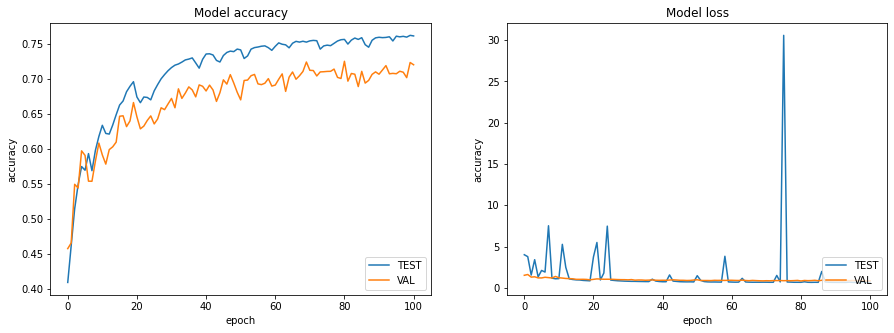

In [46]:
# Plots for visualizing the data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = np.reshape(axes, -1)

axes[0].plot(history025s.history['accuracy'], label = 'TEST')
axes[0].plot(history025s.history['val_accuracy'], label = 'VAL')
axes[0].set(title = 'Model accuracy', ylabel = 'accuracy', xlabel = 'epoch')
axes[0].legend(loc='lower right')

axes[1].plot(history025s.history['loss'], label = 'TEST')
axes[1].plot(history025s.history['val_loss'], label = 'VAL')
axes[1].set(title = 'Model loss', ylabel = 'accuracy', xlabel = 'epoch')
axes[1].legend(loc='lower right')

The training stopped after 101 epochs and there is no overfitting to be seen in the plots.

In [47]:
# Classify pose in the TEST dataset using the trained model
y025s_pred = model.predict(X025s_test)

Normalized confusion matrix


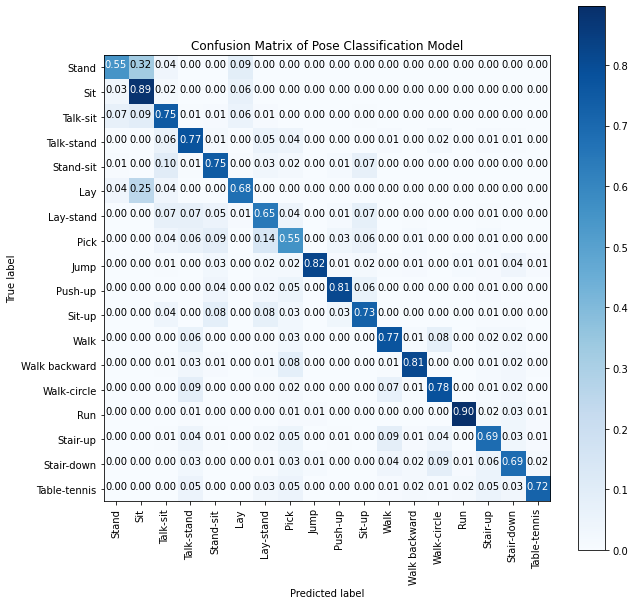

In [48]:
# Convert the prediction result to class name
y025s_pred_label = [label_names[i] for i in np.argmax(y025s_pred, axis=1)]
y025s_true_label = [label_names[i] for i in np.argmax(np.array(y025s_test), axis=1)]
label_names = classes_names

# Plot the confusion matrix
cm = confusion_matrix(np.argmax(np.array(y025s_test), axis=1), np.argmax(y025s_pred, axis=1))
plot_confusion_matrix(cm,
                      label_names,
                      normalize=True,
                      title ='Confusion Matrix of Pose Classification Model')

In [49]:
# Print the classification report
print('\nClassification Report:\n', classification_report(y025s_true_label,
                                                          y025s_pred_label))


Classification Report:
                precision    recall  f1-score   support

         Jump       0.96      0.82      0.88      1998
          Lay       0.74      0.68      0.71      5439
    Lay-stand       0.69      0.65      0.67      5286
         Pick       0.64      0.55      0.60      3999
      Push-up       0.73      0.81      0.77      1440
          Run       0.95      0.90      0.92      1785
          Sit       0.57      0.89      0.70      5622
       Sit-up       0.63      0.73      0.68      3015
   Stair-down       0.79      0.69      0.74      2343
     Stair-up       0.77      0.69      0.73      2394
        Stand       0.79      0.55      0.65      5658
    Stand-sit       0.81      0.75      0.78      6534
 Table-tennis       0.87      0.72      0.79      1374
     Talk-sit       0.65      0.75      0.70      5391
   Talk-stand       0.79      0.77      0.78      5598
         Walk       0.82      0.77      0.80      2646
Walk backward       0.76      0.81     

As predicted, the accuracy was lower in this model, but considering the short time interval, an accuracy of 72% is still very good. However as can be seen in the confusion matrix, the model confuses more activities with each other than in the previous models. For instance standing is confused a lot with sitting. This shows that a 0,25 second time interval is not sufficient to distinguish between these activities, but a 3 second interval is. For instance, running has a very high precision and recall throughout the 3 models, because of its very distinguishable characteristics.
<h1>Conclusion</h1>
The accuracy reached with a 0,25 second interval was high enough to imagine this model being used in non-life thretening situation, as for instance detecting activities to provide insight on fitness. Especially if the activities are measured over longer periods of time, there is no need to rely on a model that takes such a short interval and the 3 second model is more than good enough for that application.
The used dataset did not include falling as an activity, so it should not be used to predict falls. However, considering the high accuracies reached even with a short time interval, it can be imagined that by improving the model (for instance changing the network, adding more data or filtering it), a high enough accuracy for fall prediciton could be reached.